In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
from pyspark.sql import SparkSession
import os
import findspark

os.environ['SPARK_HOME'] = '/home/rafaelfabrichimidt/spark-3.3.2-bin-hadoop2'

findspark.init()

In [3]:
spark = SparkSession.builder\
            .master('local[*]')\
            .appName('Iniciando')\
            .getOrCreate()

23/07/08 14:27:22 WARN Utils: Your hostname, pop-os resolves to a loopback address: 127.0.1.1; using 192.168.0.107 instead (on interface wlp3s0)
23/07/08 14:27:22 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/07/08 14:27:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/07/08 14:27:25 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/07/08 14:27:25 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [5]:
df = spark.read.json('/home/rafaelfabrichimidt/Documentos/Projetos/Python/codigos/Curso_Spark/dados/curso_3/imoveis.json')

In [6]:
df.show(truncate = False)

+--------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|ident                     |listing                                                                                                                                                          |
+--------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|{775564-BOJSMVON, Website}|{{Rio de Janeiro, {-22.909429, -43.413557}, Taquara, Zona Oeste}, {0, 0, 0, 1, 0, 62, 0, 0, 62}, {45000, {150, 0}}, {Outros, Residencial}}                       |
|{660895-AUENKNYY, Website}|{{Rio de Janeiro, {-22.869698, -43.509141}, Santíssimo, Zona Oeste}, {1, 2, 0, 1, 0, 0, 0, 0, 44}, {45000, {120, 0}}, {Apartamento, Residencial}}                |
|{751522-JESYFEQL, Website}|{{Rio de Janeiro,

In [ ]:
df.limit(5).toPandas()

In [7]:
df.count()

73615

In [11]:
df.printSchema()

root
 |-- ident: struct (nullable = true)
 |    |-- customerID: string (nullable = true)
 |    |-- source: string (nullable = true)
 |-- listing: struct (nullable = true)
 |    |-- address: struct (nullable = true)
 |    |    |-- city: string (nullable = true)
 |    |    |-- location: struct (nullable = true)
 |    |    |    |-- lat: double (nullable = true)
 |    |    |    |-- lon: double (nullable = true)
 |    |    |-- neighborhood: string (nullable = true)
 |    |    |-- zone: string (nullable = true)
 |    |-- features: struct (nullable = true)
 |    |    |-- bathrooms: long (nullable = true)
 |    |    |-- bedrooms: long (nullable = true)
 |    |    |-- floors: long (nullable = true)
 |    |    |-- parkingSpaces: long (nullable = true)
 |    |    |-- suites: long (nullable = true)
 |    |    |-- totalAreas: string (nullable = true)
 |    |    |-- unitFloor: long (nullable = true)
 |    |    |-- unitsOnTheFloor: long (nullable = true)
 |    |    |-- usableAreas: string (nullable =

In [14]:
df.select('ident', 'listing').limit(5).show()

+--------------------+--------------------+
|               ident|             listing|
+--------------------+--------------------+
|{775564-BOJSMVON,...|{{Rio de Janeiro,...|
|{660895-AUENKNYY,...|{{Rio de Janeiro,...|
|{751522-JESYFEQL,...|{{Rio de Janeiro,...|
|{714052-GAAEWYKS,...|{{Rio de Janeiro,...|
|{568886-ZIBFOMCC,...|{{Rio de Janeiro,...|
+--------------------+--------------------+



In [15]:
df.select('ident.CustomerID').limit(5).show()

+---------------+
|     CustomerID|
+---------------+
|775564-BOJSMVON|
|660895-AUENKNYY|
|751522-JESYFEQL|
|714052-GAAEWYKS|
|568886-ZIBFOMCC|
+---------------+



In [16]:
df.select('ident.*').limit(5).show()

+---------------+-------+
|     customerID| source|
+---------------+-------+
|775564-BOJSMVON|Website|
|660895-AUENKNYY|Website|
|751522-JESYFEQL|Website|
|714052-GAAEWYKS|Website|
|568886-ZIBFOMCC|Website|
+---------------+-------+



In [30]:
df.select('ident.CustomerID', 'listing.*').limit(5).show()

+---------------+--------------------+--------------------+-------------------+--------------------+
|     CustomerID|             address|            features|             prices|               types|
+---------------+--------------------+--------------------+-------------------+--------------------+
|775564-BOJSMVON|{Rio de Janeiro, ...|{0, 0, 0, 1, 0, 6...|  {45000, {150, 0}}|{Outros, Residenc...|
|660895-AUENKNYY|{Rio de Janeiro, ...|{1, 2, 0, 1, 0, 0...|  {45000, {120, 0}}|{Apartamento, Res...|
|751522-JESYFEQL|{Rio de Janeiro, ...|{0, 0, 0, 0, 0, 1...|  {50000, {100, 0}}|{Outros, Residenc...|
|714052-GAAEWYKS|{Rio de Janeiro, ...|{1, 0, 0, 0, 0, 3...|{45000, {468, 346}}| {Outros, Comercial}|
|568886-ZIBFOMCC|{Rio de Janeiro, ...|{2, 3, 3, 1, 1, 0...|{50000, {400, 120}}|{Apartamento, Res...|
+---------------+--------------------+--------------------+-------------------+--------------------+



In [31]:
df.select('ident.CustomerID', 'listing.address').limit(5).show()

+---------------+--------------------+
|     CustomerID|             address|
+---------------+--------------------+
|775564-BOJSMVON|{Rio de Janeiro, ...|
|660895-AUENKNYY|{Rio de Janeiro, ...|
|751522-JESYFEQL|{Rio de Janeiro, ...|
|714052-GAAEWYKS|{Rio de Janeiro, ...|
|568886-ZIBFOMCC|{Rio de Janeiro, ...|
+---------------+--------------------+



In [32]:
df.select('ident.CustomerID', 'listing.address.*').limit(5).show()

+---------------+--------------+--------------------+--------------------+----------+
|     CustomerID|          city|            location|        neighborhood|      zone|
+---------------+--------------+--------------------+--------------------+----------+
|775564-BOJSMVON|Rio de Janeiro|{-22.909429, -43....|             Taquara|Zona Oeste|
|660895-AUENKNYY|Rio de Janeiro|{-22.869698, -43....|          Santíssimo|Zona Oeste|
|751522-JESYFEQL|Rio de Janeiro|{-22.986927, -43....|  Pedra de Guaratiba|Zona Oeste|
|714052-GAAEWYKS|Rio de Janeiro|{-22.881977, -43....|           Cascadura|Zona Norte|
|568886-ZIBFOMCC|Rio de Janeiro|{-23.027653, -43....|Recreio dos Bande...|Zona Oeste|
+---------------+--------------+--------------------+--------------------+----------+



In [36]:
df.select('ident.CustomerID', 
          'listing.address.*', 
          'listing.features.*', 
          'listing.prices.*', 
          'listing.types.*').limit(5).toPandas()

,CustomerID,city,location,neighborhood,zone,bathrooms,bedrooms,floors,parkingSpaces,suites,totalAreas,unitFloor,unitsOnTheFloor,usableAreas,price,tax,unit,usage
0,775564-BOJSMVON,Rio de Janeiro,"(-22.909429, -43.413557)",Taquara,Zona Oeste,0,0,0,1,0,62,0,0,62,45000,"(150, 0)",Outros,Residencial
1,660895-AUENKNYY,Rio de Janeiro,"(-22.869698, -43.509141)",Santíssimo,Zona Oeste,1,2,0,1,0,0,0,0,44,45000,"(120, 0)",Apartamento,Residencial
2,751522-JESYFEQL,Rio de Janeiro,"(-22.986927, -43.646786)",Pedra de Guaratiba,Zona Oeste,0,0,0,0,0,132,0,0,132,50000,"(100, 0)",Outros,Residencial
3,714052-GAAEWYKS,Rio de Janeiro,"(-22.881977, -43.330818)",Cascadura,Zona Norte,1,0,0,0,0,32,3,0,32,45000,"(468, 346)",Outros,Comercial
4,568886-ZIBFOMCC,Rio de Janeiro,"(-23.027653, -43.480742)",Recreio dos Bandeirantes,Zona Oeste,2,3,3,1,1,0,2,4,60,50000,"(400, 120)",Apartamento,Residencial


In [37]:
df.select('ident.CustomerID', 
          'listing.address.*', 
          'listing.features.*', 
          'listing.prices.tax.*',
          'listing.prices.price', 
          'listing.types.*').limit(5).toPandas()

,CustomerID,city,location,neighborhood,zone,bathrooms,bedrooms,floors,parkingSpaces,suites,totalAreas,unitFloor,unitsOnTheFloor,usableAreas,condo,iptu,price,unit,usage
0,775564-BOJSMVON,Rio de Janeiro,"(-22.909429, -43.413557)",Taquara,Zona Oeste,0,0,0,1,0,62,0,0,62,150,0,45000,Outros,Residencial
1,660895-AUENKNYY,Rio de Janeiro,"(-22.869698, -43.509141)",Santíssimo,Zona Oeste,1,2,0,1,0,0,0,0,44,120,0,45000,Apartamento,Residencial
2,751522-JESYFEQL,Rio de Janeiro,"(-22.986927, -43.646786)",Pedra de Guaratiba,Zona Oeste,0,0,0,0,0,132,0,0,132,100,0,50000,Outros,Residencial
3,714052-GAAEWYKS,Rio de Janeiro,"(-22.881977, -43.330818)",Cascadura,Zona Norte,1,0,0,0,0,32,3,0,32,468,346,45000,Outros,Comercial
4,568886-ZIBFOMCC,Rio de Janeiro,"(-23.027653, -43.480742)",Recreio dos Bandeirantes,Zona Oeste,2,3,3,1,1,0,2,4,60,400,120,50000,Apartamento,Residencial


In [6]:
df = df.select('ident.CustomerID', 
              'listing.address.*', 
              'listing.features.*', 
              'listing.prices.tax.*',
              'listing.prices.price', 
              'listing.types.*')\
       .drop('location', 'city', 'totalAreas')

In [6]:
df.limit(5).toPandas()

,CustomerID,neighborhood,zone,bathrooms,bedrooms,floors,parkingSpaces,suites,unitFloor,unitsOnTheFloor,usableAreas,condo,iptu,price,unit,usage
0,775564-BOJSMVON,Taquara,Zona Oeste,0,0,0,1,0,0,0,62,150,0,45000,Outros,Residencial
1,660895-AUENKNYY,Santíssimo,Zona Oeste,1,2,0,1,0,0,0,44,120,0,45000,Apartamento,Residencial
2,751522-JESYFEQL,Pedra de Guaratiba,Zona Oeste,0,0,0,0,0,0,0,132,100,0,50000,Outros,Residencial
3,714052-GAAEWYKS,Cascadura,Zona Norte,1,0,0,0,0,3,0,32,468,346,45000,Outros,Comercial
4,568886-ZIBFOMCC,Recreio dos Bandeirantes,Zona Oeste,2,3,3,1,1,2,4,60,400,120,50000,Apartamento,Residencial


In [40]:
df.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- neighborhood: string (nullable = true)
 |-- zone: string (nullable = true)
 |-- bathrooms: long (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- floors: long (nullable = true)
 |-- parkingSpaces: long (nullable = true)
 |-- suites: long (nullable = true)
 |-- unitFloor: long (nullable = true)
 |-- unitsOnTheFloor: long (nullable = true)
 |-- usableAreas: string (nullable = true)
 |-- condo: string (nullable = true)
 |-- iptu: string (nullable = true)
 |-- price: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- usage: string (nullable = true)



In [7]:
from pyspark.sql import functions as f
from pyspark.sql.types import DoubleType, IntegerType

In [144]:
df\
    .withColumn('usableAreas', df['usableAreas'].cast(DoubleType()))\
    .withColumn('condo', df['condo'].cast(DoubleType()))\
    .withColumn('iptu', df['iptu'].cast(DoubleType()))\
    .withColumn('price', df['price'].cast(DoubleType())).printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- neighborhood: string (nullable = true)
 |-- zone: string (nullable = true)
 |-- bathrooms: long (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- floors: long (nullable = true)
 |-- parkingSpaces: long (nullable = true)
 |-- suites: long (nullable = true)
 |-- unitFloor: long (nullable = true)
 |-- unitsOnTheFloor: long (nullable = true)
 |-- usableAreas: double (nullable = true)
 |-- condo: double (nullable = true)
 |-- iptu: double (nullable = true)
 |-- price: double (nullable = true)
 |-- unit: string (nullable = true)
 |-- usage: string (nullable = true)



In [8]:
df = df\
    .withColumn('usableAreas', df['usableAreas'].cast(DoubleType()))\
    .withColumn('condo', df['condo'].cast(DoubleType()))\
    .withColumn('iptu', df['iptu'].cast(DoubleType()))\
    .withColumn('price', df['price'].cast(DoubleType()))

In [64]:
df.limit(5).toPandas()

,CustomerID,neighborhood,zone,bathrooms,bedrooms,floors,parkingSpaces,suites,unitFloor,unitsOnTheFloor,usableAreas,condo,iptu,price,unit,usage
0,775564-BOJSMVON,Taquara,Zona Oeste,0,0,0,1,0,0,0,62.0,150.0,0.0,45000.0,Outros,Residencial
1,660895-AUENKNYY,Santíssimo,Zona Oeste,1,2,0,1,0,0,0,44.0,120.0,0.0,45000.0,Apartamento,Residencial
2,751522-JESYFEQL,Pedra de Guaratiba,Zona Oeste,0,0,0,0,0,0,0,132.0,100.0,0.0,50000.0,Outros,Residencial
3,714052-GAAEWYKS,Cascadura,Zona Norte,1,0,0,0,0,3,0,32.0,468.0,346.0,45000.0,Outros,Comercial
4,568886-ZIBFOMCC,Recreio dos Bandeirantes,Zona Oeste,2,3,3,1,1,2,4,60.0,400.0,120.0,50000.0,Apartamento,Residencial


In [67]:
df.select('usage').groupBy('usage').count().show()

+-----------+-----+
|      usage|count|
+-----------+-----+
|  Comercial| 4019|
|Residencial|69596|
+-----------+-----+



In [9]:
df = df.where(df['usage'] == 'Residencial')

In [72]:
df.select('unit').groupBy('unit').count().show()

+-----------+-----+
|       unit|count|
+-----------+-----+
|     Outros| 1190|
|Apartamento|59106|
|       Casa| 9300|
+-----------+-----+



In [74]:
df.select('zone').groupBy('zone').count().show()

+------------+-----+
|        zone|count|
+------------+-----+
|  Zona Norte|14379|
|  Zona Oeste|35523|
|Zona Central| 1002|
|    Zona Sul|18535|
|            |  157|
+------------+-----+



In [115]:
df.select([f.count(f.when(f.isnull(df[a]), 1)).alias(a) for a in df.columns]).show(vertical = True)

-RECORD 0---------------
 CustomerID      | 0    
 neighborhood    | 0    
 zone            | 0    
 bathrooms       | 0    
 bedrooms        | 0    
 floors          | 0    
 parkingSpaces   | 0    
 suites          | 0    
 unitFloor       | 0    
 unitsOnTheFloor | 0    
 usableAreas     | 0    
 condo           | 6061 
 iptu            | 8726 
 price           | 0    
 unit            | 0    
 usage           | 0    



In [116]:
df\
    .select(
        [f.count(f.when(f.isnull(df[a]) | f.isnan(df[a]), 1)).alias(a) for a in df.columns]
    ).show(vertical = True)

-RECORD 0---------------
 CustomerID      | 0    
 neighborhood    | 0    
 zone            | 0    
 bathrooms       | 0    
 bedrooms        | 0    
 floors          | 0    
 parkingSpaces   | 0    
 suites          | 0    
 unitFloor       | 0    
 unitsOnTheFloor | 0    
 usableAreas     | 0    
 condo           | 6061 
 iptu            | 8726 
 price           | 0    
 unit            | 0    
 usage           | 0    



In [10]:
df = df\
    .select('*')\
    .na\
    .fill(0)

In [129]:
df.select([f.count(f.when(f.isnull(df[a]), 1)).alias(a) for a in df.columns]).show(vertical = True)

-RECORD 0--------------
 CustomerID      | 0   
 neighborhood    | 0   
 zone            | 0   
 bathrooms       | 0   
 bedrooms        | 0   
 floors          | 0   
 parkingSpaces   | 0   
 suites          | 0   
 unitFloor       | 0   
 unitsOnTheFloor | 0   
 usableAreas     | 0   
 condo           | 0   
 iptu            | 0   
 price           | 0   
 unit            | 0   
 usage           | 0   



In [132]:
df.where(df['zone'] == '').limit(5).toPandas()

,CustomerID,neighborhood,zone,bathrooms,bedrooms,floors,parkingSpaces,suites,unitFloor,unitsOnTheFloor,usableAreas,condo,iptu,price,unit,usage
0,414812-MDCSNYIJ,Centro,,1,1,0,1,0,0,0,14.0,0.0,0.0,110000.0,Outros,Residencial
1,458881-BKLQHIRG,Campo Grande,,1,2,0,2,0,1,0,252.0,0.0,0.0,150000.0,Casa,Residencial
2,571109-FXOKDSGL,Campo Grande,,1,2,0,0,0,1,0,105.0,0.0,0.0,150000.0,Casa,Residencial
3,491439-BEYFWXII,Pedra de Guaratiba,,1,3,0,1,1,0,0,50.0,340.0,0.0,175000.0,Apartamento,Residencial
4,680705-BQOBOVXB,Grajaú,,1,2,0,0,0,0,0,48.0,400.0,0.0,179999.0,Apartamento,Residencial


In [11]:
df = df.where(df['zone'] != '')

# ML

In [149]:
#DUMMY

df.select('unit').show(5)

+-----------+
|       unit|
+-----------+
|     Outros|
|Apartamento|
|     Outros|
|Apartamento|
|     Outros|
+-----------+
only showing top 5 rows



In [150]:
df\
    .groupBy('CustomerID')\
    .pivot('unit')\
    .agg(f.lit(1))\
    .na\
    .fill(0)\
    .show(5)

+---------------+-----------+----+------+
|     CustomerID|Apartamento|Casa|Outros|
+---------------+-----------+----+------+
|062130-QKYMWGMV|          1|   0|     0|
|630945-AEEUPRXI|          0|   1|     0|
|994985-OZQNHQKH|          1|   0|     0|
|494674-JWXRZIBM|          1|   0|     0|
|458844-UJCRFSRI|          1|   0|     0|
+---------------+-----------+----+------+
only showing top 5 rows



In [12]:
#onehotencoder
unit = df\
    .groupBy('CustomerID')\
    .pivot('unit')\
    .agg(f.lit(1))\
    .na\
    .fill(0)

In [13]:
#onehotencoder
zone = df\
    .groupBy('CustomerID')\
    .pivot('zone')\
    .agg(f.lit(1))\
    .na\
    .fill(0)

In [157]:
df\
    .join(unit, on = 'CustomerID', how = 'inner')\
    .join(zone, on = 'CustomerID', how = 'inner').limit(5).toPandas()

,CustomerID,neighborhood,zone,bathrooms,bedrooms,floors,parkingSpaces,suites,unitFloor,unitsOnTheFloor,usableAreas,condo,iptu,price,unit,usage,Apartamento,Casa,Outros,Zona Central,Zona Norte,Zona Oeste,Zona Sul
0,775564-BOJSMVON,Taquara,Zona Oeste,0,0,0,1,0,0,0,62.0,150.0,0.0,45000.0,Outros,Residencial,0,0,1,0,0,1,0
1,660895-AUENKNYY,Santíssimo,Zona Oeste,1,2,0,1,0,0,0,44.0,120.0,0.0,45000.0,Apartamento,Residencial,1,0,0,0,0,1,0
2,751522-JESYFEQL,Pedra de Guaratiba,Zona Oeste,0,0,0,0,0,0,0,132.0,100.0,0.0,50000.0,Outros,Residencial,0,0,1,0,0,1,0
3,568886-ZIBFOMCC,Recreio dos Bandeirantes,Zona Oeste,2,3,3,1,1,2,4,60.0,400.0,120.0,50000.0,Apartamento,Residencial,1,0,0,0,0,1,0
4,526755-OBLTYTEN,Guaratiba,Zona Oeste,0,0,0,0,0,0,0,200.0,0.0,0.0,50000.0,Outros,Residencial,0,0,1,0,0,1,0


In [14]:
#onehotencoder
df = df\
        .join(unit, on = 'CustomerID', how = 'inner')\
        .join(zone, on = 'CustomerID', how = 'inner')

In [15]:
#mudando nome da variavel price(nossa target) para label
df = df.withColumnRenamed('price', 'label')

# Vetorizando

In [16]:
#funcao para vetorizar o dataframe spark
from pyspark.ml.feature import VectorAssembler

In [19]:
#variaibeis independentes
X = [
 'bathrooms',
 'bedrooms',
 'floors',
 'parkingSpaces',
 'suites',
 'unitFloor',
 'unitsOnTheFloor',
 'usableAreas',
 'condo',
 'iptu',
 'Apartamento',
 'Casa',
 'Outros',
 'Zona Central',
 'Zona Norte',
 'Zona Oeste',
 'Zona Sul']

#passando Vector with features
assembler = VectorAssembler(inputCols = X, outputCol = 'features')

#transformando daraframe spark em data frame vector
df_ml = assembler.transform(df).select('features', 'label')

In [21]:
df_ml.limit(5).show(truncate = False)

23/07/02 15:45:17 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------------------------------------------------------------+-------+
|features                                                                  |label  |
+--------------------------------------------------------------------------+-------+
|(17,[3,7,8,12,15],[1.0,62.0,150.0,1.0,1.0])                               |45000.0|
|(17,[0,1,3,7,8,10,15],[1.0,2.0,1.0,44.0,120.0,1.0,1.0])                   |45000.0|
|(17,[7,8,12,15],[132.0,100.0,1.0,1.0])                                    |50000.0|
|[2.0,3.0,3.0,1.0,1.0,2.0,4.0,60.0,400.0,120.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0]|50000.0|
|(17,[7,12,15],[200.0,1.0,1.0])                                            |50000.0|
+--------------------------------------------------------------------------+-------+



## Matriz de Correlação 

In [23]:
#importando bibliotecas
from pyspark.ml.stat import Correlation
import pandas as pd

In [24]:
#calculando correlacao de pearson
correlacao = Correlation.corr(df_ml, 'features').collect()

#pegando a DenseMatrix com os valores da correlacao
correlacao = correlacao[0][0]

#convertando para array e depois dataframe pandas
correlacao = correlacao.toArray()
df_correlacao = pd.DataFrame(data = correlacao, columns = X, index = X)

23/07/02 15:48:49 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/07/02 15:48:49 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/07/02 15:48:49 WARN InstanceBuilder$JavaBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


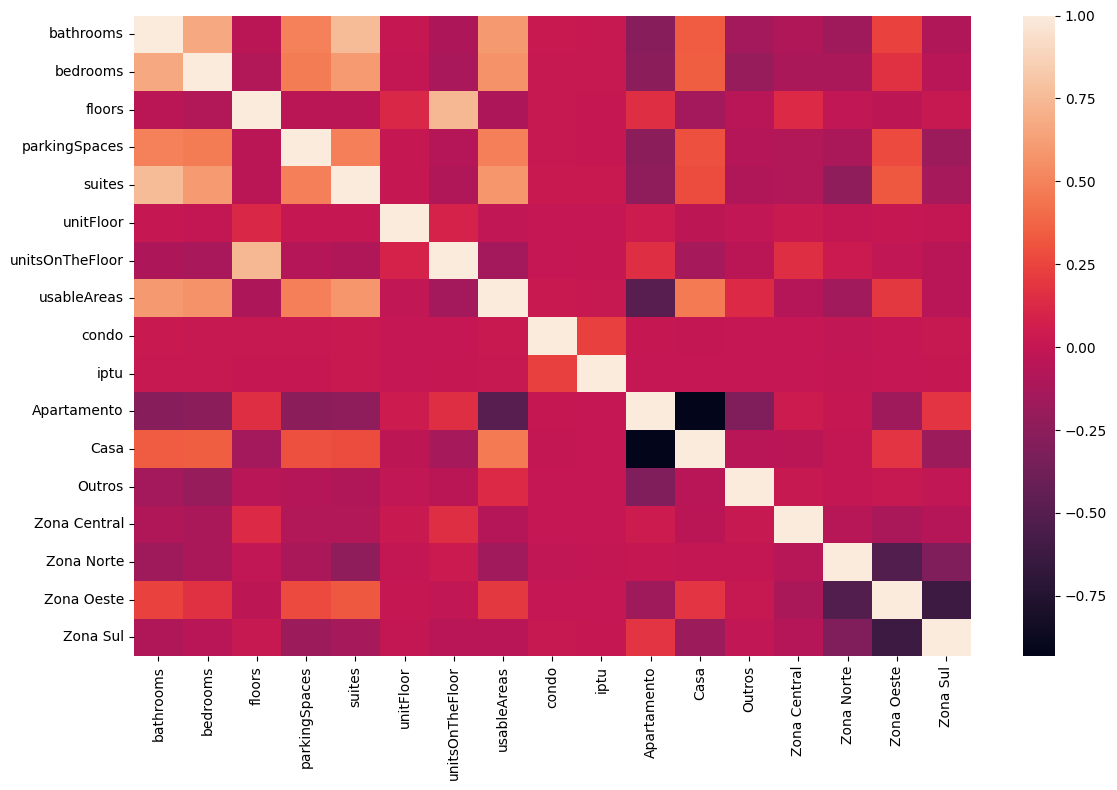

In [25]:
#fazendos graficos
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,8))

sns.heatmap(df_correlacao, ax = ax)

fig.tight_layout();

## Modelo de Machine Learning

### Linear Regression

In [26]:
#separar em treino e teste
from pyspark.ml.regression import LinearRegression

#separandod dados em treino e teste
treino, teste = df_ml.randomSplit([0.7, 0.3], seed = 101)

print(treino.count())
print(teste.count())

48528


20911


In [27]:
#instanciando Linear Regression
lr = LinearRegression()

#Ajustando modelo
model = lr.fit(treino)

#prevendo resultados para o treino
pred_treino = model.transform(treino)

23/07/02 15:51:04 WARN Instrumentation: [4089c933] regParam is zero, which might cause numerical instability and overfitting.


23/07/02 15:51:05 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK
23/07/02 15:51:06 WARN Instrumentation: [4089c933] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


In [28]:
pred_treino.show()

+--------------------+--------+------------------+
|            features|   label|        prediction|
+--------------------+--------+------------------+
|(17,[0,1,2,3,4,5,...|260000.0|443266.04737020144|
|(17,[0,1,2,3,4,5,...|500000.0|1127455.8300462805|
|(17,[0,1,2,3,4,5,...|308615.0|111210.49949889386|
|(17,[0,1,2,3,4,5,...|279000.0|113587.95787719043|
|(17,[0,1,2,3,4,5,...|545000.0|340703.71307873435|
|(17,[0,1,2,3,4,5,...|449000.0|390571.99595798284|
|(17,[0,1,2,3,4,5,...|479000.0| 444003.4297194885|
|(17,[0,1,2,3,4,5,...|420000.0| 720022.1542161054|
|(17,[0,1,2,3,4,5,...|265000.0|519406.05037395435|
|(17,[0,1,2,3,4,5,...|490000.0| 845483.5388437647|
|(17,[0,1,2,3,4,5,...|650000.0| 644931.4982488954|
|(17,[0,1,2,3,4,5,...|379900.0| 448889.3339027724|
|(17,[0,1,2,3,4,5,...|449000.0| 714548.9501108339|
|(17,[0,1,2,3,4,5,...|190000.0| 411726.9411630478|
|(17,[0,1,2,3,4,5,...|896000.0| 597499.4601552959|
|(17,[0,1,2,3,4,5,...|679000.0| 864544.0129262989|
|(17,[0,1,2,3,4,5,...|620000.0|

In [41]:
#PLOTANDO METRICAS 

metricas = model.summary

print('RESULTADOS TREINO')
print("Metrica R2 = {}".format(metricas.r2))
print("Metrica RMSE = {}".format(metricas.rootMeanSquaredError))

#prevendo resultados para teste
metricas_teste = model.evaluate(teste)

print('RESULTADOS TESTE')
print("Metrica R2 = {}".format(metricas_teste.r2))
print("Metrica RMSE = {}".format(metricas_teste.rootMeanSquaredError))

RESULTADOS TREINO
Metrica R2 = 0.6655873678454578
Metrica RMSE = 810348.969531623


RESULTADOS TESTE
Metrica R2 = 0.6585207937774393
Metrica RMSE = 800525.9696828632


In [42]:
pred_teste = model.transform(teste)

print(pred_teste.show(5))

+--------------------+--------+------------------+
|            features|   label|        prediction|
+--------------------+--------+------------------+
|(17,[0,1,2,3,4,5,...|199000.0|227422.40734194184|
|(17,[0,1,2,3,4,5,...|350000.0|  621930.066529243|
|(17,[0,1,2,3,4,5,...|340000.0| 512863.9734519677|
|(17,[0,1,2,3,4,5,...|430000.0| 460989.0284421368|
|(17,[0,1,2,3,4,5,...|600000.0| 801303.1592107594|
+--------------------+--------+------------------+
only showing top 5 rows

None


### Decision Tree

In [46]:
from pyspark.ml.regression import DecisionTreeRegressor

dtr = DecisionTreeRegressor(seed = 101, maxDepth = 7)

modelo_dtr = dtr.fit(treino)

previsoes_dtr_treino = modelo_dtr.transform(treino)

previsoes_dtr_treino.show(5)

+--------------------+--------+-----------------+
|            features|   label|       prediction|
+--------------------+--------+-----------------+
|(17,[0,1,2,3,4,5,...|260000.0|340855.8044843049|
|(17,[0,1,2,3,4,5,...|500000.0|553816.2525860447|
|(17,[0,1,2,3,4,5,...|308615.0|340855.8044843049|
|(17,[0,1,2,3,4,5,...|279000.0|340855.8044843049|
|(17,[0,1,2,3,4,5,...|545000.0|    445137.460625|
+--------------------+--------+-----------------+
only showing top 5 rows



In [47]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator()

r2 = evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName : 'r2'})
rmse = evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName : 'rmse'})

print('RESULTADOS TREINO')
print("Metrica R2 = {}".format(r2))
print("Metrica RMSE = {}".format(rmse))

RESULTADOS TREINO
Metrica R2 = 0.7930752588471226
Metrica RMSE = 637436.5434260432


In [50]:
previsoes_dtr_teste = modelo_dtr.transform(teste)

previsoes_dtr_teste.show(5)

+--------------------+--------+-----------------+
|            features|   label|       prediction|
+--------------------+--------+-----------------+
|(17,[0,1,2,3,4,5,...|199000.0|340855.8044843049|
|(17,[0,1,2,3,4,5,...|350000.0| 820272.937751004|
|(17,[0,1,2,3,4,5,...|340000.0|553816.2525860447|
|(17,[0,1,2,3,4,5,...|430000.0|553816.2525860447|
|(17,[0,1,2,3,4,5,...|600000.0|553816.2525860447|
+--------------------+--------+-----------------+
only showing top 5 rows



In [51]:
r2 = evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName : 'r2'})
rmse = evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName : 'rmse'})

print('RESULTADOS TREINO')
print("Metrica R2 = {}".format(r2))
print("Metrica RMSE = {}".format(rmse))

RESULTADOS TREINO
Metrica R2 = 0.7738133838892687
Metrica RMSE = 651518.489920883


### Random Forest

In [58]:
from pyspark.ml.regression import RandomForestRegressor

rfr = RandomForestRegressor(maxDepth = 7, numTrees = 10)

rfr_fit = rfr.fit(treino)

treino_previsto = rfr_fit.transform(treino)

treino_previsto.show(5)

+--------------------+--------+------------------+
|            features|   label|        prediction|
+--------------------+--------+------------------+
|(17,[0,1,2,3,4,5,...|260000.0|   389047.84298231|
|(17,[0,1,2,3,4,5,...|500000.0| 541624.3182379007|
|(17,[0,1,2,3,4,5,...|308615.0| 362884.8438499922|
|(17,[0,1,2,3,4,5,...|279000.0| 362884.8438499922|
|(17,[0,1,2,3,4,5,...|545000.0|388222.57782198687|
+--------------------+--------+------------------+
only showing top 5 rows



In [59]:
r2 = evaluator.evaluate(treino_previsto, {evaluator.metricName : 'r2'})
rmse = evaluator.evaluate(treino_previsto, {evaluator.metricName : 'rmse'})

print('RESULTADOS TREINO')
print("Metrica R2 = {}".format(r2))
print("Metrica RMSE = {}".format(rmse))

RESULTADOS TREINO
Metrica R2 = 0.8052830371982479
Metrica RMSE = 618347.5444842785


In [61]:
teste_previsto = rfr_fit.transform(teste)

teste_previsto.show(5)

+--------------------+--------+-----------------+
|            features|   label|       prediction|
+--------------------+--------+-----------------+
|(17,[0,1,2,3,4,5,...|199000.0|362884.8438499922|
|(17,[0,1,2,3,4,5,...|350000.0|786166.0037315981|
|(17,[0,1,2,3,4,5,...|340000.0|531062.3044979877|
|(17,[0,1,2,3,4,5,...|430000.0|552296.1424855788|
|(17,[0,1,2,3,4,5,...|600000.0|583713.5056724654|
+--------------------+--------+-----------------+
only showing top 5 rows



In [62]:
r2 = evaluator.evaluate(teste_previsto, {evaluator.metricName : 'r2'})
rmse = evaluator.evaluate(teste_previsto, {evaluator.metricName : 'rmse'})

print('RESULTADOS TREINO')
print("Metrica R2 = {}".format(r2))
print("Metrica RMSE = {}".format(rmse))

RESULTADOS TREINO
Metrica R2 = 0.7940287745293488
Metrica RMSE = 621722.4792626562


23/07/03 20:11:38 WARN TransportChannelHandler: Exception in connection from /192.168.0.109:39677
java.io.IOException: Tempo esgotado para conexão
	at java.base/sun.nio.ch.SocketDispatcher.read0(Native Method)
	at java.base/sun.nio.ch.SocketDispatcher.read(SocketDispatcher.java:47)
	at java.base/sun.nio.ch.IOUtil.readIntoNativeBuffer(IOUtil.java:330)
	at java.base/sun.nio.ch.IOUtil.read(IOUtil.java:284)
	at java.base/sun.nio.ch.IOUtil.read(IOUtil.java:259)
	at java.base/sun.nio.ch.SocketChannelImpl.read(SocketChannelImpl.java:417)
	at io.netty.buffer.PooledByteBuf.setBytes(PooledByteBuf.java:258)
	at io.netty.buffer.AbstractByteBuf.writeBytes(AbstractByteBuf.java:1132)
	at io.netty.channel.socket.nio.NioSocketChannel.doReadBytes(NioSocketChannel.java:350)
	at io.netty.channel.nio.AbstractNioByteChannel$NioByteUnsafe.read(AbstractNioByteChannel.java:151)
	at io.netty.channel.nio.NioEventLoop.processSelectedKey(NioEventLoop.java:722)
	at io.netty.channel.nio.NioEventLoop.processSelectedK